In [76]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Ananya Sharma
# Matrix Project
import h5py
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plot


In [78]:
dataset_1 = scipy.io.loadmat('/content/drive/MyDrive/matrix_project/harvard.mat')
dataset_2 = scipy.io.loadmat('/content/drive/MyDrive/matrix_project/IndianTourism.mat')

In [79]:
def Page_rank(U,G,p):
  # size of G
  row,col = np.shape(G)
  # number of outdegrees
  c = G.sum(axis=0)
  c = np.asarray(c).reshape(-1)
   # number of indegrees
  b = G.sum(axis=1)
  b = np.asarray(b).reshape(-1)
  G = G.toarray()                   
  A = np.zeros((row,col))
  for i in range(row):
    for j in range(col):
      if c[j] != 0:
        A[i][j] = p * G[i][j] / c[j] + (1-p)/col
      else:
        A[i][j] = 1/col
        
  x= np.ones((col,1))
  for l in range(1000):
    x_n = np.linalg.norm(x, ord=1)
    a   = A.dot(x)
    x   = a /x_n
    y = np.linalg.norm(a, ord=1)/x_n 
    if (y ==1):
      break
  plot.plot(x)
  plot.title("PageRank")
  plot.show()
  ind = np.argsort(x,axis=0) # sorting x 
  ind = ind[::-1]     
  U=U[ind[0:6]].reshape(6,1)
  x=x[ind[0:6]].reshape(6,1)
  my_array = np.array([ind[0:6]+np.ones((6,1),dtype=int),x,b[ind[0:6]],c[ind[0:6]],U])
  df = pd.DataFrame(my_array.T.reshape(6,-1), columns = [" ","page-rank","in","out","url"])
  print(df.set_index(" "))

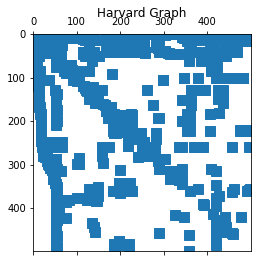

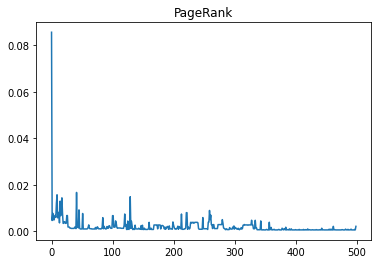

    page-rank   in out                                                url
                                                                         
1     0.08564  195  26                           [http://www.harvard.edu]
42   0.016699   42   0  [http://search.harvard.edu:8765/custom/query.h...
10    0.01568   21  18                               [http://www.hbs.edu]
130  0.014853   24  12                       [http://www.med.harvard.edu]
18   0.014367   45  46                       [http://www.gse.harvard.edu]
15   0.012947   16  49                       [http://www.hms.harvard.edu]


In [80]:

U=dataset_1.get('U')
G=dataset_1.get('G')
plot.title('Harvard Graph')
plot.spy(G)
plot.show()
Page_rank(U,G,0.85)

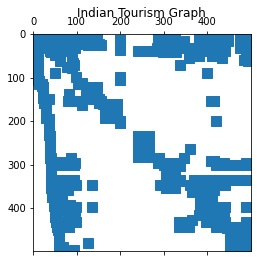

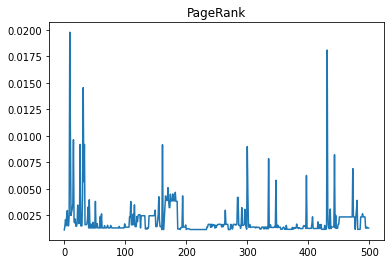

    page-rank  in out                           url
                                                   
10   0.019776  69   2           [http://www.nic.in]
432  0.018096   7   1  [http://www.makeinindia.com]
32   0.014549  36   0         [http://india.gov.in]
11   0.010146  59  61           [http://cmf.gov.in]
16   0.009635  40   0          [http://drupal.org)]
27   0.009191   3   9        [http://nkn.gov.in/en]


In [81]:
U=dataset_2.get('U')
G=dataset_2.get('G')
plot.title('Indian Tourism Graph')
plot.spy(G)
plot.show()
Page_rank(U,G,0.85)